In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Datasets/Iris.csv")

In [4]:
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [5]:
df1= df.iloc[0:100, 0:6]

In [6]:
df1

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0     1            5.1           3.5            1.4           0.2   
1     2            4.9           3.0            1.4           0.2   
2     3            4.7           3.2            1.3           0.2   
3     4            4.6           3.1            1.5           0.2   
4     5            5.0           3.6            1.4           0.2   
..  ...            ...           ...            ...           ...   
95   96            5.7           3.0            4.2           1.2   
96   97            5.7           2.9            4.2           1.3   
97   98            6.2           2.9            4.3           1.3   
98   99            5.1           2.5            3.0           1.1   
99  100            5.7           2.8            4.1           1.3   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
95  Iris-versicolor  
96  Iris-versicolor  
97  Iris-versicolor  
98  Iris-versicolor  
99  Iris-versicolor  

[100 rows x 6 columns]

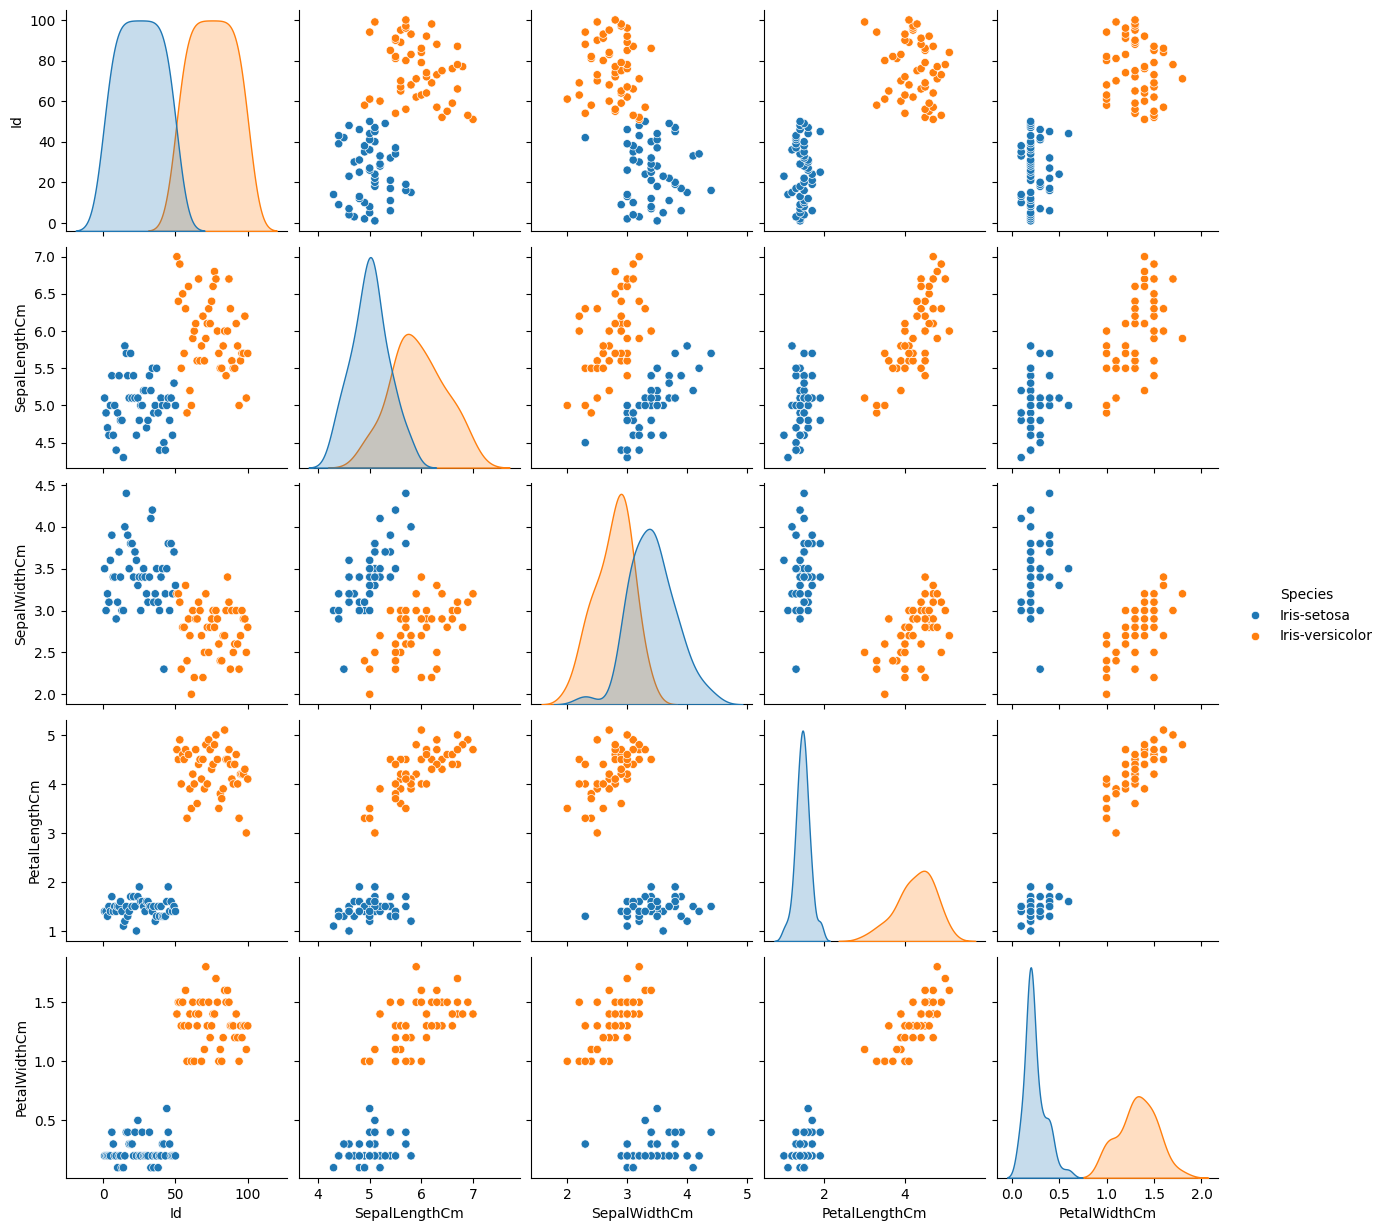

In [48]:
sns.pairplot(df1,hue="Species")
plt.show()

petalength,sepallength

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

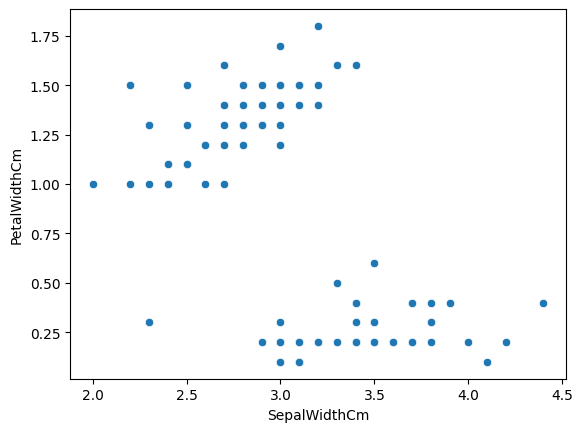

In [8]:
sns.scatterplot(x = df1["SepalWidthCm"], y = df1["PetalWidthCm"])

In [9]:
a = df1.iloc[0:100, [2,4,5]]

In [10]:
a

SepalWidthCm  PetalWidthCm          Species
0            3.5           0.2      Iris-setosa
1            3.0           0.2      Iris-setosa
2            3.2           0.2      Iris-setosa
3            3.1           0.2      Iris-setosa
4            3.6           0.2      Iris-setosa
..           ...           ...              ...
95           3.0           1.2  Iris-versicolor
96           2.9           1.3  Iris-versicolor
97           2.9           1.3  Iris-versicolor
98           2.5           1.1  Iris-versicolor
99           2.8           1.3  Iris-versicolor

[100 rows x 3 columns]

In [11]:
from sklearn.preprocessing import LabelEncoder
l_svm = LabelEncoder()
a["Species"] = l_svm.fit_transform(a["Species"])

In [12]:
x= a[["SepalWidthCm","PetalWidthCm"]]
x

SepalWidthCm  PetalWidthCm
0            3.5           0.2
1            3.0           0.2
2            3.2           0.2
3            3.1           0.2
4            3.6           0.2
..           ...           ...
95           3.0           1.2
96           2.9           1.3
97           2.9           1.3
98           2.5           1.1
99           2.8           1.3

[100 rows x 2 columns]

In [13]:
y = a["Species"]
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Species, Length: 100, dtype: int32

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.svm import SVC

In [17]:
model = SVC(kernel="linear")

In [18]:
model

SVC(kernel='linear')

In [19]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [20]:
pred = model.predict(x_test)
pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [21]:
y_test

25    0
50    1
28    0
30    0
59    1
56    1
55    1
38    0
90    1
23    0
9     0
89    1
17    0
64    1
97    1
13    0
95    1
29    0
70    1
75    1
Name: Species, dtype: int32

In [22]:
predf = pd.DataFrame({"Actual": y_test, "Predicted":pred})
predf

Actual  Predicted
25       0          0
50       1          1
28       0          0
30       0          0
59       1          1
56       1          1
55       1          1
38       0          0
90       1          1
23       0          0
9        0          0
89       1          1
17       0          0
64       1          1
97       1          1
13       0          0
95       1          1
29       0          0
70       1          1
75       1          1

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Polynomial Kernel

In [25]:
b = a.copy()
b

SepalWidthCm  PetalWidthCm  Species
0            3.5           0.2        0
1            3.0           0.2        0
2            3.2           0.2        0
3            3.1           0.2        0
4            3.6           0.2        0
..           ...           ...      ...
95           3.0           1.2        1
96           2.9           1.3        1
97           2.9           1.3        1
98           2.5           1.1        1
99           2.8           1.3        1

[100 rows x 3 columns]

In [26]:
b["SepalWidthCm"] = b["SepalWidthCm"]**2
b["PetalWidthCm"] = b["PetalWidthCm"]**2
b["SepalWidthCm*PetalWidthCm"] = (b["SepalWidthCm"]*b["PetalWidthCm"])
b.head()

SepalWidthCm  PetalWidthCm  Species  SepalWidthCm*PetalWidthCm
0         12.25          0.04        0                     0.4900
1          9.00          0.04        0                     0.3600
2         10.24          0.04        0                     0.4096
3          9.61          0.04        0                     0.3844
4         12.96          0.04        0                     0.5184

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

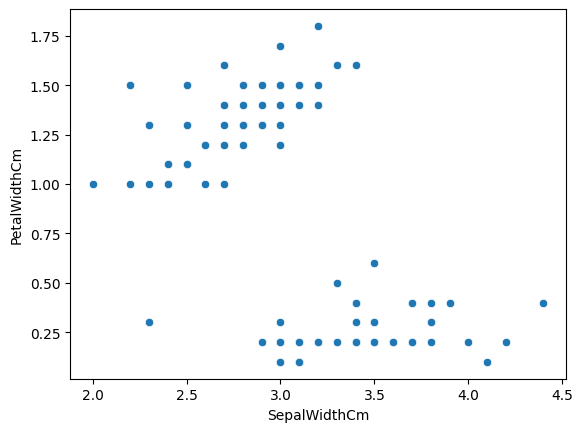

In [27]:
sns.scatterplot(x= a["SepalWidthCm"],y = a["PetalWidthCm"])

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

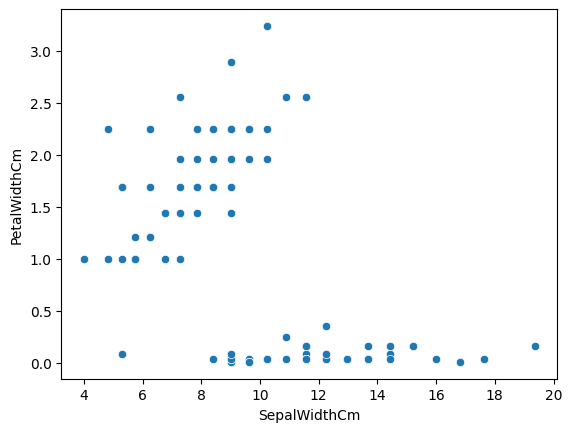

In [28]:
sns.scatterplot(x= b["SepalWidthCm"], y = b["PetalWidthCm"])

In [29]:
#pip install plotly

In [30]:
b

SepalWidthCm  PetalWidthCm  Species  SepalWidthCm*PetalWidthCm
0          12.25          0.04        0                     0.4900
1           9.00          0.04        0                     0.3600
2          10.24          0.04        0                     0.4096
3           9.61          0.04        0                     0.3844
4          12.96          0.04        0                     0.5184
..           ...           ...      ...                        ...
95          9.00          1.44        1                    12.9600
96          8.41          1.69        1                    14.2129
97          8.41          1.69        1                    14.2129
98          6.25          1.21        1                     7.5625
99          7.84          1.69        1                    13.2496

[100 rows x 4 columns]

In [31]:
# import plotly.io as pio
# pio.renderers.default = 'notebook'

In [32]:
#pip install --upgrade plotly

In [33]:
#pip install --upgrade notebook

In [34]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [35]:
import plotly.express as px
from IPython.display import display, IFrame

fig = px.scatter_3d(b, x="SepalWidthCm", y="PetalWidthCm", z="SepalWidthCm*PetalWidthCm", color="Species")

# Save the plot as an HTML file
html_file = "3d_scatter_plot.html"
fig.write_html(html_file)

# Display the HTML file
display(IFrame(src=html_file, width=800, height=600))

In [36]:
#pip install --upgrade plotly

sepallength and sepalwidth

In [43]:
adf = a.copy()
adf

SepalWidthCm  PetalWidthCm  Species
0            3.5           0.2        0
1            3.0           0.2        0
2            3.2           0.2        0
3            3.1           0.2        0
4            3.6           0.2        0
..           ...           ...      ...
95           3.0           1.2        1
96           2.9           1.3        1
97           2.9           1.3        1
98           2.5           1.1        1
99           2.8           1.3        1

[100 rows x 3 columns]

In [44]:
adf["SepalWidthCm*PetalWidthCm"] = (df["SepalWidthCm"]*df["PetalWidthCm"])

In [45]:
adf

SepalWidthCm  PetalWidthCm  Species  SepalWidthCm*PetalWidthCm
0            3.5           0.2        0                       0.70
1            3.0           0.2        0                       0.60
2            3.2           0.2        0                       0.64
3            3.1           0.2        0                       0.62
4            3.6           0.2        0                       0.72
..           ...           ...      ...                        ...
95           3.0           1.2        1                       3.60
96           2.9           1.3        1                       3.77
97           2.9           1.3        1                       3.77
98           2.5           1.1        1                       2.75
99           2.8           1.3        1                       3.64

[100 rows x 4 columns]

In [47]:
fig = px.scatter_3d(adf, x="SepalWidthCm", y="PetalWidthCm", z="SepalWidthCm*PetalWidthCm", color="Species")

# Save the plot as an HTML file
html_file = "3d_scatter_plot.html"
fig.write_html(html_file)

# Display the HTML file
display(IFrame(src=html_file, width=1000, height=600))

In [50]:
fig = px.scatter_3d(df, x="SepalWidthCm", y="PetalWidthCm", z="SepalLengthCm", color="Species")

# Save the plot as an HTML file
html_file = "3d_scatter_plot.html"
fig.write_html(html_file)

# Display the HTML file
display(IFrame(src=html_file, width=1000, height=600))